# Discrete Fourier transforms (DFT):

Sometime we don't have analytical functions, but discrete data and we may be interested in characterising the spectral information of such data.

The discrete-time Fourier transform of a discrete sequence of real or complex numbers $x[n]$, for all integers $n$, is a Fourier series, which produces a periodic function of a frequency variable. When the frequency variable, $\omega$, has normalized units of radians/sample, the periodicity is $2\pi$, and the Fourier series is:

To do this, we can carry out a Discrete Fourier Transform (DFT), defined as:

$\chi(k) =\sum_{n=0}^{N-1}x(n)\,e^{\frac{-i\,2\pi\,k\,n}{N}}$

where $k=0, ..., N-1$, where

$N$ = number of samples

$n$ = current sample

$k$ = current frequency, where $𝑘\in[0,N−1]$

$x_n$ = the sine value at sample $n$.

$\chi_k$ = The DFT which includes information of both amplitude and phase.




### Example 1:

Find the DFT of x = (0, 1, 2, 3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\chi(k) =\sum_{n=0}^{N-1}x(n)\,e^{\frac{-i\,2\pi\,k\,n}{N}}$

In [5]:
def DFT_function(signal):
    
    N = len(signal) #length of the signal
    n = np.arange(0, N)
    k = n.reshape((N, 1))
    
    exp_term = np.exp(-2j*np.pi*k*n/N)
    
    chi = np.dot(exp_term, signal)
    
    return chi
    

In [6]:
signal_1 = np.arange(0, 4, 1) # this is x(n)
print(signal_1)

[0 1 2 3]


In [7]:
fourier_1 = DFT_function(signal_1)

In [9]:
print("X(k) =", fourier_1)

X(k) = [ 6.+0.00000000e+00j -2.+2.00000000e+00j -2.-7.34788079e-16j
 -2.-2.00000000e+00j]


# Example:

# Exercise:


Calculate the characteristic frequencies of the following series:

$y(t)=\sum_i^n i\,\cos(i\alpha\,t)$, with $\alpha = 20\pi$

(a) Compute them analytically first.

(b) Then, using Fourier transforms.

In [10]:
def function_series(t, a, n):
    # t - time axis
    # a = 20*pi
    # n is a free parameter, from 0 to n
    
    nu = []
    f = np.zeros(t.size)
    
    for i in range(n+1):
        
        y = i*np.cos(i*a*t)
        
        #Analytical frequencies
        nu.append(i*a/(2*np.pi))
        
        f += y

    # Fourier Analysis
    F_n = np.fft.fft(f, t.size)
    F_m = np.abs(F_n)
    freqs = np.fft.fftfreq(t.size, np.pi/10000)
        
    nu = np.array(nu)    
    return f, nu, freqs, F_m

In [11]:
t = np.linspace(0, np.pi, 10000, endpoint=True)

a = 20*np.pi
n = 10
y_result, nu_result, freqs_result, F_result = function_series(t, a, n)

In [12]:
print(nu_result)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


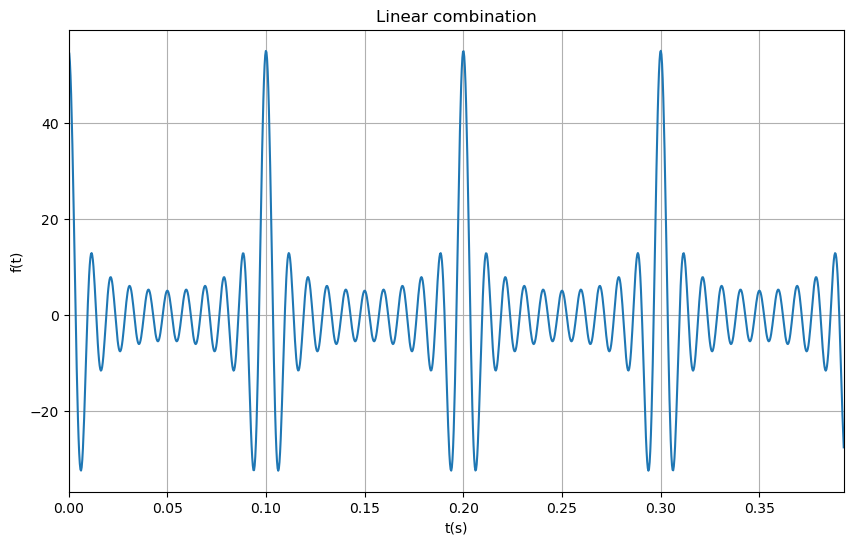

In [13]:
#plotting
plt.figure(figsize = (10, 6))

plt.plot(t, y_result)
plt.title('Linear combination')
plt.xlim(0, np.pi/8)
plt.xlabel('t(s)')
plt.ylabel('f(t)')

#plt.axis(axes_range)
plt.grid()
plt.show()

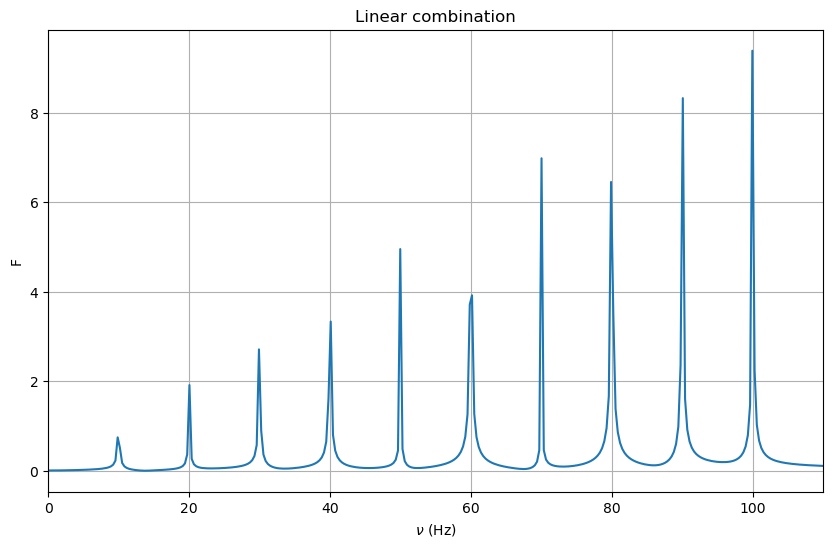

In [14]:
#plotting
plt.figure(figsize = (10, 6))

plt.plot(freqs_result[0:freqs_result.size//2], (2/F_result.size)*F_result[0:F_result.size//2])
plt.title('Linear combination')
plt.xlim(0, 110)
plt.xlabel(r'$\nu$ (Hz)')
plt.ylabel('F')

#plt.axis(axes_range)
plt.grid()
plt.show()